In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
test = pd.read_csv('/content/DailyDelhiClimateTest.csv')
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
train = train.set_index('date')
test = test.set_index('date')

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [5]:
train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

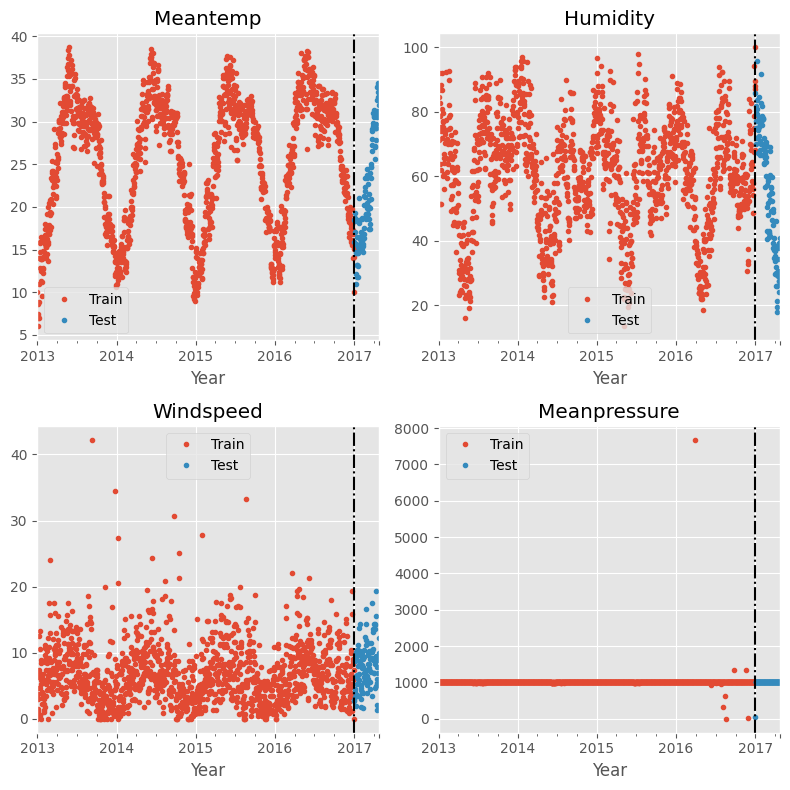

In [8]:
plt.figure(figsize=(8,8))
i = 1
for c in train.columns:
    plt.subplot(2, 2, i)
    train[c].plot(style = '.')
    test[c].plot(style = '.')
    plt.axvline('2017-01-01', color = 'black', ls = '-.')
    plt.legend(['Train', 'Test'], loc = 'best')
    plt.title(c.capitalize().replace('_', ''))
    plt.xlabel('Year')
    i += 1
plt.tight_layout()
plt.show()

In [10]:
for df in [train, test]:
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day'] = df.index.dayofyear

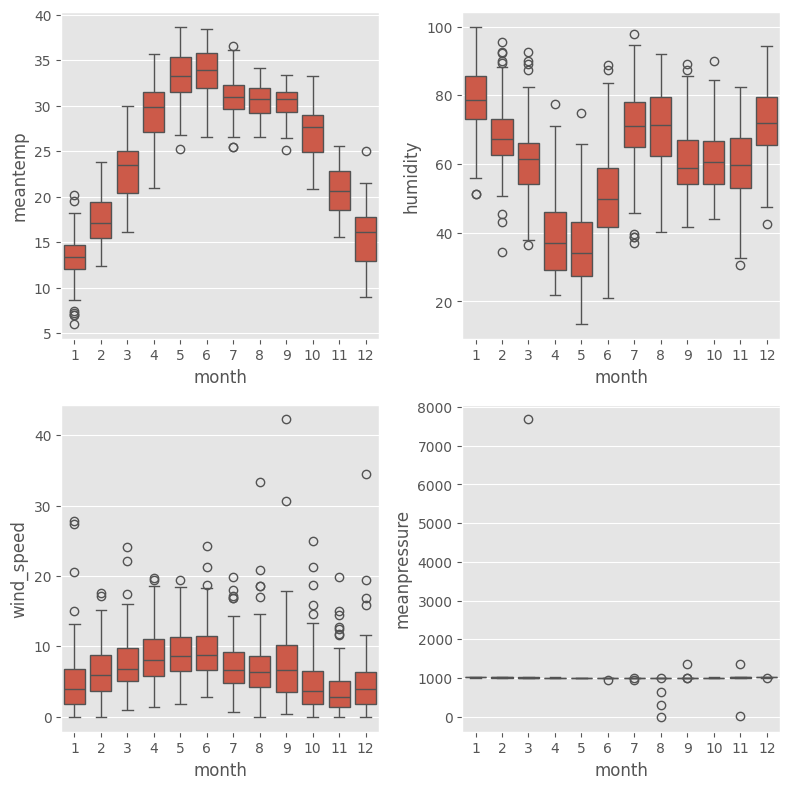

In [11]:
plt.figure(figsize=(8,8))
i = 1
for c in train.columns[0:4]:
    plt.subplot(2, 2, i)
    sns.boxplot(data=train, x='month', y=c)
    i += 1
plt.tight_layout()
plt.show()

In [12]:
X_train = train.loc[:,['day', 'month', 'year']]
y_train = train['meantemp']
X_test = test.loc[:,['day', 'month', 'year']]
y_test = test['meantemp']

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
xgb_reg = xgb.XGBRegressor(device = 'gpu',n_estimators=1000,early_stopping_rounds=50,learning_rate = 0.01)
# Grid search params
test_params = {
 'max_depth':[1, 2, 3, 4],
 'objective': ['reg:squarederror', 'reg:linear']}

model = GridSearchCV(estimator = xgb_reg,param_grid = test_params)
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],verbose=1000)
model.best_params_

[0]	validation_0-rmse:7.32331	validation_1-rmse:7.19350
[999]	validation_0-rmse:2.35492	validation_1-rmse:2.23786
[0]	validation_0-rmse:7.33083	validation_1-rmse:7.54396
[999]	validation_0-rmse:2.38047	validation_1-rmse:2.41959
[0]	validation_0-rmse:7.33506	validation_1-rmse:7.58976
[774]	validation_0-rmse:2.54961	validation_1-rmse:2.59255
[0]	validation_0-rmse:7.31835	validation_1-rmse:7.41524
[845]	validation_0-rmse:2.40478	validation_1-rmse:2.34931
[0]	validation_0-rmse:7.37809	validation_1-rmse:6.88568
[611]	validation_0-rmse:2.84256	validation_1-rmse:2.78972
[0]	validation_0-rmse:7.32331	validation_1-rmse:7.19350
[999]	validation_0-rmse:2.35492	validation_1-rmse:2.23786
[0]	validation_0-rmse:7.33083	validation_1-rmse:7.54396
[999]	validation_0-rmse:2.38047	validation_1-rmse:2.41959
[0]	validation_0-rmse:7.33506	validation_1-rmse:7.58976
[773]	validation_0-rmse:2.55069	validation_1-rmse:2.59234
[0]	validation_0-rmse:7.31835	validation_1-rmse:7.41524
[844]	validation_0-rmse:2.40554	

{'max_depth': 3, 'objective': 'reg:squarederror'}